<h1><center>MACHINE LEARNING INTERMEDIATE PROJECT (IRIS)</center></h1>

![](files/iris1.png)

## Table of Contents

1. [Description of the dataset](#section1)<br>
2. [Problem Statement](#section2)
3. [Importing the packages and loading data](#section3)
4. [Information about the dataset](#section4)
5. [Exploratory analysis - Visualization](#section5)<br/>
6. [Data Preparation](#section6)<br/>
7. [Modelling the data](#section7)<br/>
8. [Conclusion](#section8)<br/>

<a id=section1></a>

## 1. Description of the dataset

The iris dataset comprises of 50 samples each for the 3 different species, namely, Iris-setosa, Iris-versicolor and Iris-virginica. The dataset also consists of the measurements in terms of sepal length (cm), sepal width (cm), petal length (cm) and petal width (cm). 

<a id=section2></a>

## 2.  Problem Statement

Using this data we will try to identify the species of Iris based on the available features of sepal and petal. We will be training the model based on these features.

<a id=section3></a>

## 3. Importing the packages and loading data  

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC

In [2]:
iris = pd.read_csv("C:\\INSAID\\working files\\Machine Learning Intermediate\\iris.csv")

<a id=section4></a>

## 4. Information about the dataset

In [3]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


In [4]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
iris.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [6]:
iris.shape

(150, 6)

In [7]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


<a id=section5></a>

## 5. Exploratory analysis - Visualization

Understand the spread of the features using visualization.

Relationship between Sepal Length and Width using pairplot

C:\INSAID\anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


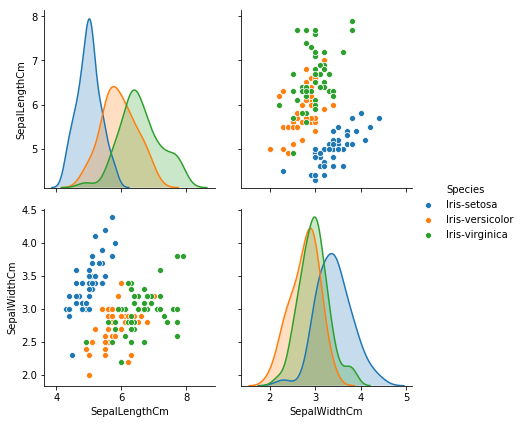

In [8]:
sns.pairplot(iris[['SepalLengthCm','SepalWidthCm', 'Species']], hue="Species", size=3)

We can see that Sepal Length and Sepal Width features are slightly correlated with each other.

C:\INSAID\anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


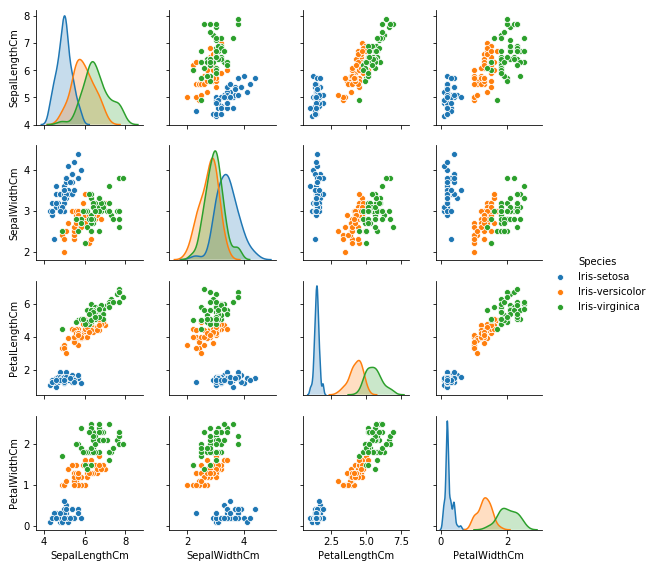

In [9]:
sns.pairplot(iris.drop("Id", axis = 1), hue = "Species", size = 2)

 There is a clear correlation between Petal features and type of species.

Relationship between Petal Length and Width using a scatter plot

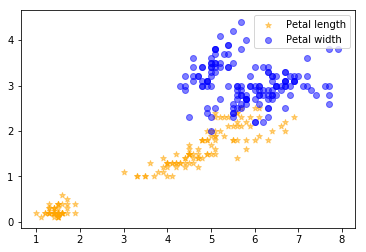

In [10]:
plt.scatter(iris['PetalLengthCm'],iris['PetalWidthCm'],marker='*',alpha=.5,color='orange',label='Petal length')
plt.scatter(iris['SepalLengthCm'],iris['SepalWidthCm'],marker='o',alpha=.5,color='blue',label='Petal width')
plt.legend()
plt.show()

Checking correlation between the features

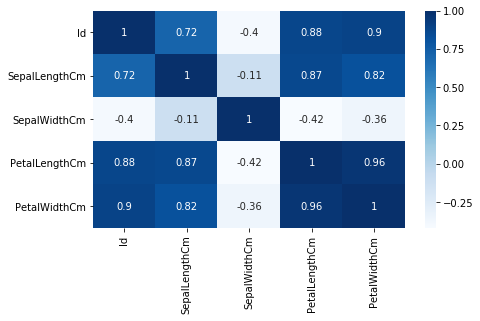

In [11]:
plt.figure(figsize=(7,4)) 
sns.heatmap(iris.corr(),annot=True,cmap='Blues')
plt.show()

The Petal Width and Length are highly correlated whereas the Sepal Length and Width show weak correlations. We will use Machine Learning to verify that Species can be identified better using Petal compared to Sepal.

<a id=section6></a>

## 6. Data Preparation

In [12]:
petal = np.array(iris[["PetalLengthCm","PetalWidthCm"]])
sepal = np.array(iris[["SepalLengthCm","SepalWidthCm"]])

key = {'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2}
Y = iris['Species'].map(key)

Creating the Training and testing datasets

In [13]:
from sklearn.model_selection import train_test_split
X_train_S, X_test_S, y_train_S, y_test_S = train_test_split(sepal,Y,test_size=0.2,random_state=42)
X_train_P, X_test_P, y_train_P, y_test_P = train_test_split(petal,Y,test_size=0.2,random_state=42)

Standardizing and Scaling the features

In [14]:
scaler = StandardScaler()

scaler.fit(X_train_S)
X_train_std_S = scaler.transform(X_train_S)
X_test_std_S = scaler.transform(X_test_S)

scaler.fit(X_train_P)
X_train_std_P = scaler.transform(X_train_P)
X_test_std_P = scaler.transform(X_test_P)


print('Standardized features for Sepal and Petal \n')
print("Sepal\n\n" +str(X_train_std_S[:2]))
print("\nPetal\n\n" +str(X_train_std_P[:2]))

Standardized features for Sepal and Petal 

Sepal

[[-1.47393679  1.22037928]
 [-0.13307079  3.02001693]]

Petal

[[-1.5639872  -1.30948358]
 [-1.27728011 -1.04292204]]


<a id=section7></a>

## 7. Modelling the data

We will use the following algorithms:
 - Decision tree
 - Logistic Regression
 - K-Nearest Neighbors
 - Support Vector Machines

### Decision Tree Classifier

In [15]:
model = DecisionTreeClassifier(criterion='gini',max_depth=4,presort=True)
model.fit(X_train_std_S,y_train_S)
print('Training Accuracy Sepal = {}'.format(model.score(X_train_std_S, y_train_S)))
print('Testing  Accuracy Sepal = {}'.format(model.score(X_test_std_S, y_test_S)))

model.fit(X_train_std_P,y_train_P)
print('\nTraining Accuracy Petal = {}'.format(model.score(X_train_std_P, y_train_P)))
print('Testing  Accuracy Petal = {}'.format(model.score(X_test_std_P, y_test_P)))

Training Accuracy Sepal = 0.8083333333333333
Testing  Accuracy Sepal = 0.8333333333333334

Training Accuracy Petal = 0.975
Testing  Accuracy Petal = 1.0


### Logistic Regression

In [16]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs', multi_class='auto')
model.fit(X_train_std_S,y_train_S)
print('Training Accuracy Sepal = {}'.format(model.score(X_train_std_S, y_train_S)))
print('Testing  Accuracy Sepal = {}'.format(model.score(X_test_std_S, y_test_S)))

model.fit(X_train_std_P,y_train_P)
print('\nTraining Accuracy Petal = {}'.format(model.score(X_train_std_P, y_train_P)))
print('Testing  Accuracy Petal = {}'.format(model.score(X_test_std_P, y_test_P)))

Training Accuracy Sepal = 0.7916666666666666
Testing  Accuracy Sepal = 0.9

Training Accuracy Petal = 0.9416666666666667
Testing  Accuracy Petal = 1.0


### K- Nearest Neighbours

In [17]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train_std_S,y_train_S)
print('Training Accuracy Sepal = {}'.format(model.score(X_train_std_S, y_train_S)))
print('Testing  Accuracy Sepal = {}'.format(model.score(X_test_std_S, y_test_S)))

model.fit(X_train_std_P,y_train_P)
print('\nTraining Accuracy Petal = {}'.format(model.score(X_train_std_P, y_train_P)))
print('Testing  Accuracy Petal = {}'.format(model.score(X_test_std_P, y_test_P)))

Training Accuracy Sepal = 0.8333333333333334
Testing  Accuracy Sepal = 0.8333333333333334

Training Accuracy Petal = 0.9833333333333333
Testing  Accuracy Petal = 1.0


### Support Vector Machines

In [18]:
from sklearn.svm import LinearSVC

model = LinearSVC(C=10, max_iter=10000)
model.fit(X_train_std_S,y_train_S)
print('Training Accuracy Sepal = {}'.format(model.score(X_train_std_S, y_train_S)))
print('Testing  Accuracy Sepal = {}'.format(model.score(X_test_std_S, y_test_S)))

model.fit(X_train_std_P,y_train_P)
print('\nTraining Accuracy Petal = {}'.format(model.score(X_train_std_P, y_train_P)))
print('Testing  Accuracy Petal = {}'.format(model.score(X_test_std_P, y_test_P)))

Training Accuracy Sepal = 0.775
Testing  Accuracy Sepal = 0.9333333333333333

Training Accuracy Petal = 0.95
Testing  Accuracy Petal = 1.0


<a id=section8></a>

## 8. Conclusion

Using Petals over Sepal for training the data gives a much better accuracy. As mentioned in section 5 using the heatmap correlation, we can conclude that Petal Length and Width are the best features to identify the species of Iris.